#Import Library

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

#The Dataset

In [187]:
dataset = pd.read_csv('kidney_disease.csv')
#dataset.head()
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


#Exploratory Data Analysis and Missing Data Handling

Visualizing the missing data heatmap

<Figure size 720x432 with 0 Axes>

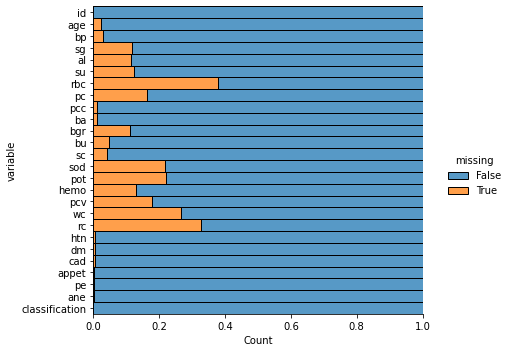

In [188]:
plt.figure(figsize=(10,6))
sns.displot(
    data=dataset.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

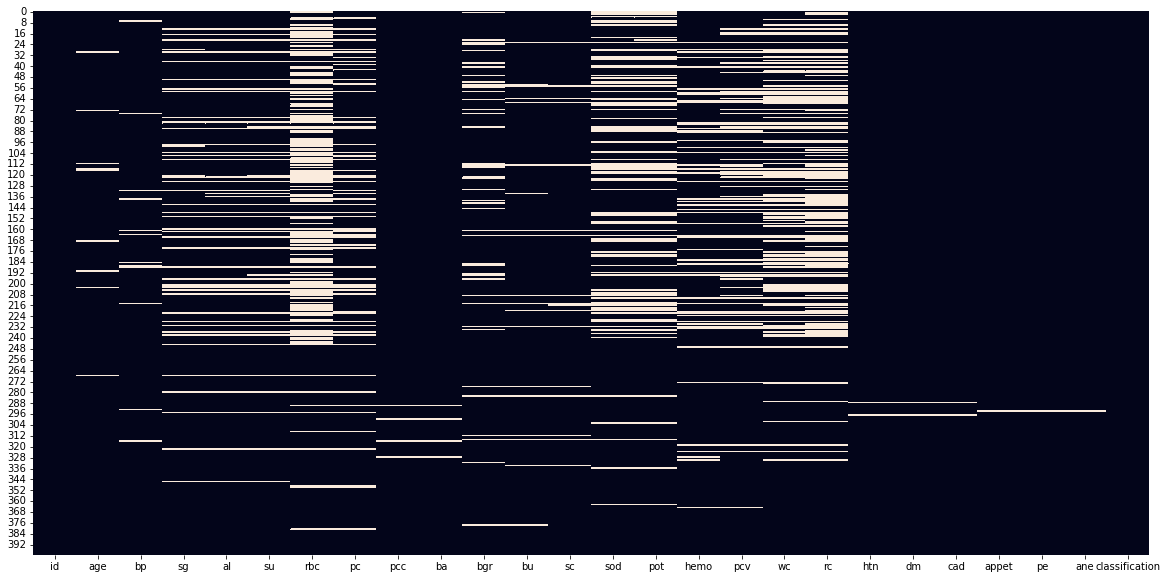

In [189]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dataset.isnull(), cbar=False)

Finding the percentage of missing data for each attribute

In [190]:
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'column_name': dataset.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

                   column_name  percent_missing
id                          id             0.00
age                        age             2.25
bp                          bp             3.00
sg                          sg            11.75
al                          al            11.50
su                          su            12.25
rbc                        rbc            38.00
pc                          pc            16.25
pcc                        pcc             1.00
ba                          ba             1.00
bgr                        bgr            11.00
bu                          bu             4.75
sc                          sc             4.25
sod                        sod            21.75
pot                        pot            22.00
hemo                      hemo            13.00
pcv                        pcv            17.75
wc                          wc            26.50
rc                          rc            32.75
htn                        htn          

Dropping the columns with more than 20% missing value

In [191]:
dataset = dataset.dropna(thresh=0.8*len(dataset), axis=1)
dataset

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,...,sc,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,...,1.2,15.4,44.0,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,NaN,...,0.8,11.3,38.0,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,...,1.8,9.6,31.0,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,...,3.8,11.2,32.0,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,...,1.4,11.6,35.0,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,140.0,...,0.5,15.7,47.0,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.0,...,1.2,16.5,54.0,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,100.0,...,0.6,15.8,49.0,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.0,...,1.0,14.2,51.0,no,no,no,good,no,no,notckd


In [192]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dataset.iloc[:,6] = label.fit_transform(dataset.iloc[:,6])
dataset.iloc[:,7] = label.fit_transform(dataset.iloc[:,7])
dataset.iloc[:,8] = label.fit_transform(dataset.iloc[:,8])
dataset.iloc[:,14] = label.fit_transform(dataset.iloc[:,14])
dataset.iloc[:,15] = label.fit_transform(dataset.iloc[:,15])
dataset.iloc[:,16] = label.fit_transform(dataset.iloc[:,16])
dataset.iloc[:,17] = label.fit_transform(dataset.iloc[:,17])
dataset.iloc[:,18] = label.fit_transform(dataset.iloc[:,18])
dataset.iloc[:,19] = label.fit_transform(dataset.iloc[:,19])
dataset.iloc[:,20] = label.fit_transform(dataset.iloc[:,20])
dataset.loc[(dataset.classification == 1),'classification']=0
dataset.loc[(dataset.classification == 2),'classification']=1
dataset.drop('id', axis=1, inplace=True)
display(dataset)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,0,0,121.0,36.0,1.2,15.4,44.0,1,2,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,0,0,NaN,18.0,0.8,11.3,38.0,0,1,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,0,0,423.0,53.0,1.8,9.6,31.0,0,2,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,0,1,0,117.0,56.0,3.8,11.2,32.0,1,1,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,0,0,106.0,26.0,1.4,11.6,35.0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,0,0,140.0,49.0,0.5,15.7,47.0,0,1,1,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,0,0,75.0,31.0,1.2,16.5,54.0,0,1,1,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,0,0,100.0,26.0,0.6,15.8,49.0,0,1,1,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,0,0,114.0,50.0,1.0,14.2,51.0,0,1,1,0,0,0,1


In [193]:
column_names = dataset.columns

Taking care of missing data by using K Nearest Neighbour Imputation Algorithm

In [194]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values

In [195]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.nan, n_neighbors=7)
X = imputer.fit_transform(X)

In [196]:
from imblearn.over_sampling import SVMSMOTE
ros = SVMSMOTE(k_neighbors=5)
X, y = ros.fit_resample(X, y)
print(X.shape)

(500, 19)


#Feature Selection

#Splitting and Scaling

In [197]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [198]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape)

(400, 19)


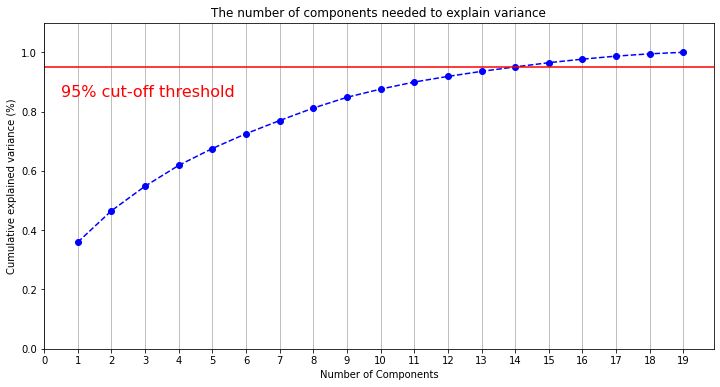

In [199]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_train)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 20, step=1)
y1 = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y1, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 20, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative explained variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [200]:
pca_ = PCA(copy=True, n_components=13, whiten=False)
x_pca_train = pca_.fit_transform(x_train)
print(x_pca_train.shape)

(400, 13)


In [201]:
x_pca_test = pca_.transform(x_test)
x_pca_test.shape

(100, 13)

#Nearest Neighbour Approach

Applying elbow method to get the best K for KNN

Text(0, 0.5, 'Mean Error')

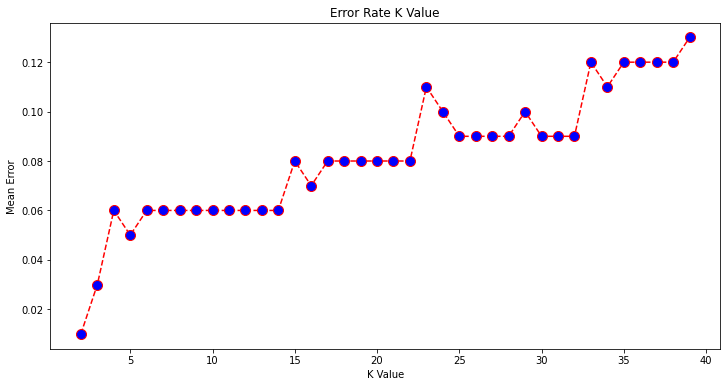

In [202]:
from sklearn.neighbors import KNeighborsClassifier
error = []

for i in range(2, 40):
    knn = KNeighborsClassifier(n_neighbors=i,p=2,metric='minkowski')
    knn.fit(x_pca_train, y_train)
    pred_i = knn.predict(x_pca_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(2, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Chosing 2 as the value of K

[[48  1]
 [ 0 51]]
0.99
              precision    recall  f1-score   support

           0     1.0000    0.9796    0.9897        49
           1     0.9808    1.0000    0.9903        51

    accuracy                         0.9900       100
   macro avg     0.9904    0.9898    0.9900       100
weighted avg     0.9902    0.9900    0.9900       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


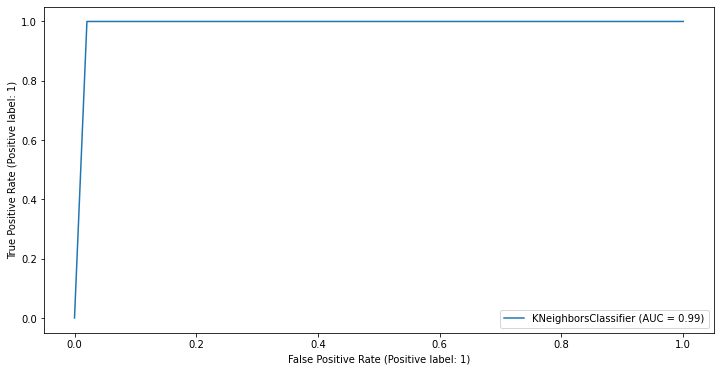

In [203]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(x_pca_train, y_train)
y_pred = classifier.predict(x_pca_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
from sklearn import metrics
metrics.plot_roc_curve(classifier, x_pca_test, y_test) 
plt.show()

#Support vector machine approach

[[47  2]
 [ 0 51]]
0.98
              precision    recall  f1-score   support

           0     1.0000    0.9592    0.9792        49
           1     0.9623    1.0000    0.9808        51

    accuracy                         0.9800       100
   macro avg     0.9811    0.9796    0.9800       100
weighted avg     0.9808    0.9800    0.9800       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


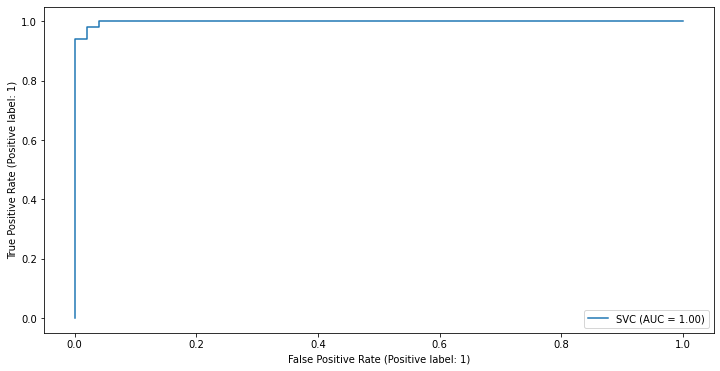

In [204]:
from sklearn.svm import SVC
classifier1 = SVC(kernel = 'linear', random_state = 0)
classifier1.fit(x_pca_train, y_train)
y_pred = classifier1.predict(x_pca_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred , digits = 4))
metrics.plot_roc_curve(classifier1, x_pca_test, y_test) 
plt.show()

With "poly" as kernel.

[[43  6]
 [ 1 50]]
0.93
              precision    recall  f1-score   support

           0     0.9773    0.8776    0.9247        49
           1     0.8929    0.9804    0.9346        51

    accuracy                         0.9300       100
   macro avg     0.9351    0.9290    0.9297       100
weighted avg     0.9342    0.9300    0.9298       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


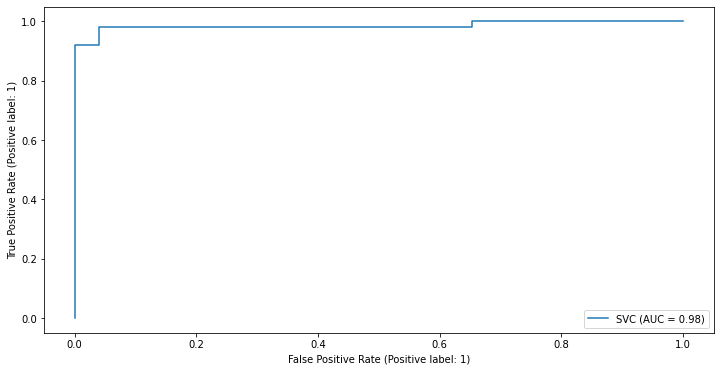

In [205]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'poly', random_state = 0)
classifier2.fit(x_pca_train, y_train)
y_pred = classifier2.predict(x_pca_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(classifier2, x_pca_test, y_test) 
plt.show()

[[47  2]
 [ 0 51]]
0.98
              precision    recall  f1-score   support

           0     1.0000    0.9592    0.9792        49
           1     0.9623    1.0000    0.9808        51

    accuracy                         0.9800       100
   macro avg     0.9811    0.9796    0.9800       100
weighted avg     0.9808    0.9800    0.9800       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


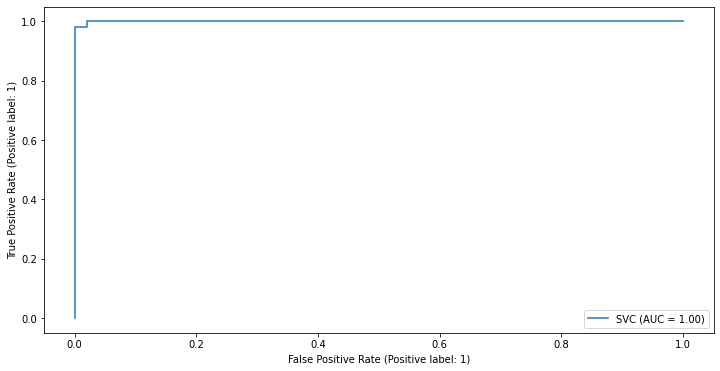

In [206]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'rbf', random_state = 0)
classifier2.fit(x_pca_train, y_train)
y_pred = classifier2.predict(x_pca_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(classifier2, x_pca_test, y_test) 
plt.show()

#Bayesian Approach

Gaussian Naive Bayes

[[47  2]
 [ 5 46]]
0.93
              precision    recall  f1-score   support

           0     0.9038    0.9592    0.9307        49
           1     0.9583    0.9020    0.9293        51

    accuracy                         0.9300       100
   macro avg     0.9311    0.9306    0.9300       100
weighted avg     0.9316    0.9300    0.9300       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


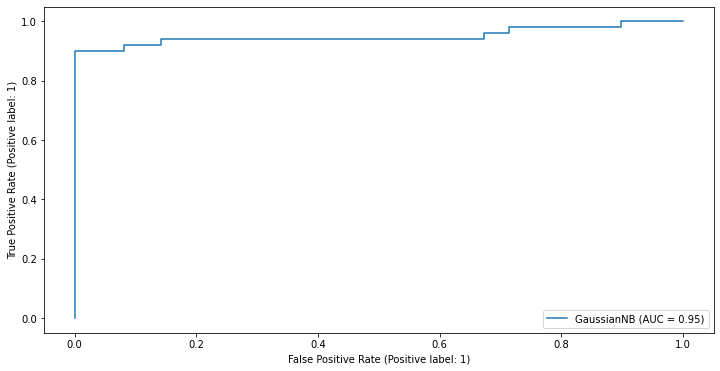

In [207]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(x_pca_train, y_train)
y_pred = classifier3.predict(x_pca_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(classifier3, x_pca_test, y_test) 
plt.show()

Bernouli Naive Bayes

[[39 10]
 [ 1 50]]
0.89
              precision    recall  f1-score   support

           0     0.9750    0.7959    0.8764        49
           1     0.8333    0.9804    0.9009        51

    accuracy                         0.8900       100
   macro avg     0.9042    0.8882    0.8887       100
weighted avg     0.9028    0.8900    0.8889       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


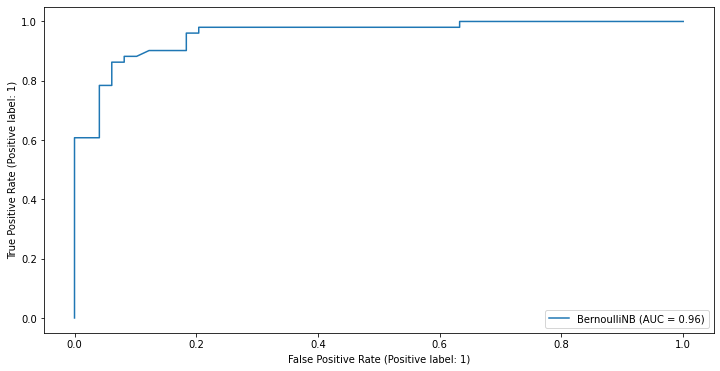

In [208]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(x_pca_train, y_train)
y_pred = clf.predict(x_pca_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(clf, x_pca_test, y_test) 
plt.show()

#Tree based approach

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[48  1]
 [ 0 51]]
0.99
              precision    recall  f1-score   support

           0     1.0000    0.9796    0.9897        49
           1     0.9808    1.0000    0.9903        51

    accuracy                         0.9900       100
   macro avg     0.9904    0.9898    0.9900       100
weighted avg     0.9902    0.9900    0.9900       100



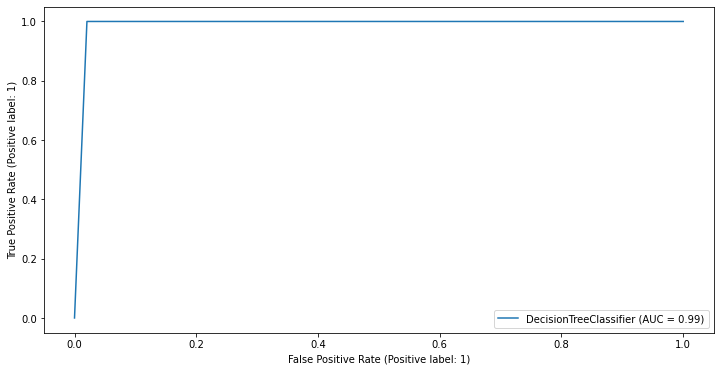

In [209]:
from sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier4.fit(x_pca_train, y_train)
y_pred = classifier4.predict(x_pca_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(classifier4, x_pca_test, y_test) 
plt.show()

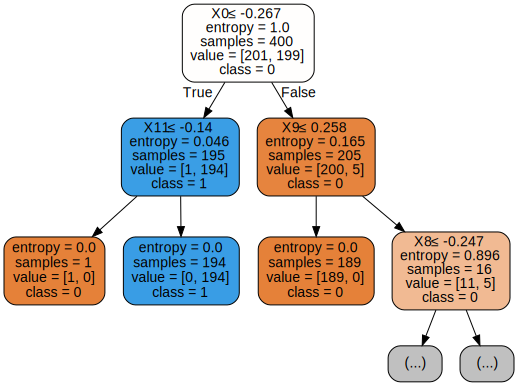

In [210]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(classifier4, out_file=None, 
                      max_depth = 2,
                      class_names=['0', '1'],  
                      filled=True, rounded=True,  
                      special_characters=True,)  
graph = graphviz.Source(dot_data)  
graph 

## Random forest

[[37  1]
 [ 2 35]]
0.96
              precision    recall  f1-score   support

           0     0.9487    0.9737    0.9610        38
           1     0.9722    0.9459    0.9589        37

    accuracy                         0.9600        75
   macro avg     0.9605    0.9598    0.9600        75
weighted avg     0.9603    0.9600    0.9600        75



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


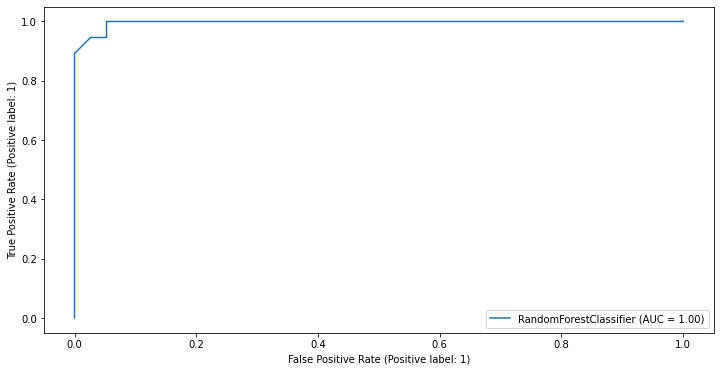

In [223]:
from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)
classifier5.fit(x_pca_train, y_train)
y_pred = classifier5.predict(x_pca_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(classifier5, x_pca_test, y_test) 
plt.show()

#Linear Models

[[47  2]
 [ 1 50]]
0.97
              precision    recall  f1-score   support

           0     0.9792    0.9592    0.9691        49
           1     0.9615    0.9804    0.9709        51

    accuracy                         0.9700       100
   macro avg     0.9704    0.9698    0.9700       100
weighted avg     0.9702    0.9700    0.9700       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


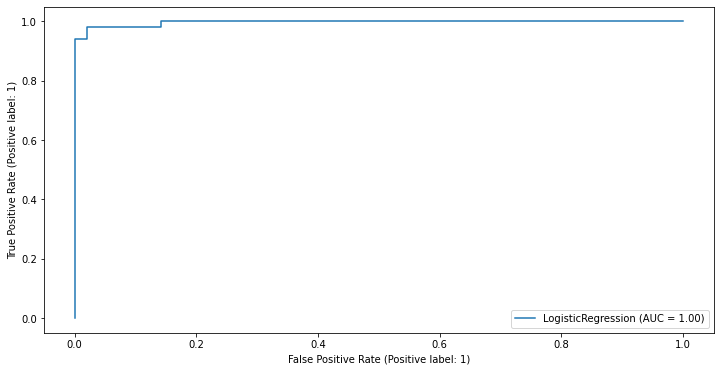

In [212]:
from sklearn.linear_model import LogisticRegression
classifier6 = LogisticRegression(random_state = 0)
classifier6.fit(x_pca_train, y_train)
y_pred = classifier6.predict(x_pca_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(classifier6, x_pca_test, y_test) 
plt.show()

#Ensemble Methods

AdaBoost Method

[[49  0]
 [ 3 48]]
0.97
              precision    recall  f1-score   support

           0     0.9423    1.0000    0.9703        49
           1     1.0000    0.9412    0.9697        51

    accuracy                         0.9700       100
   macro avg     0.9712    0.9706    0.9700       100
weighted avg     0.9717    0.9700    0.9700       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


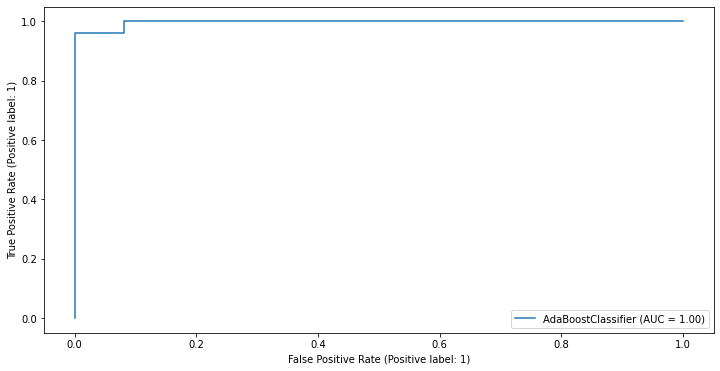

In [213]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=25, learning_rate=0.9) #This learning rate is too good
clf.fit(x_pca_train, y_train)
y_pred = clf.predict(x_pca_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(clf, x_pca_test, y_test) 
plt.show()

**voting**

In [214]:
from sklearn.ensemble import VotingClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
svm_rbf = SVC(kernel = 'rbf', random_state = 0)
ada = AdaBoostClassifier(n_estimators=25, learning_rate=0.9)
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
lr = LogisticRegression(random_state = 0)
hardVoting = VotingClassifier(estimators = [('knn',knn), ('svc',svm_rbf), ('ada',ada), ('dt',dt), ('lr',lr)], weights = [1,1,1,1,1]).fit(x_pca_train,y_train)
y_pred = hardVoting.predict(x_pca_test)
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    0.9796    0.9897        49
           1     0.9808    1.0000    0.9903        51

    accuracy                         0.9900       100
   macro avg     0.9904    0.9898    0.9900       100
weighted avg     0.9902    0.9900    0.9900       100



In [215]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
x_pca_train = pca_.fit_transform(x_train)
x_pca_test = pca_.transform(x_test)

In [216]:
non_ckd = []
ckd = []
j=0
for i in y_train:
  if i == 0:
    non_ckd.append(j)
  elif i == 1:
    ckd.append(j)
  j += 1
print(ckd)
len(ckd)

[0, 1, 3, 4, 5, 7, 9, 10, 11, 13, 16, 17, 20, 22, 26, 28, 30, 33, 35, 39, 40, 41, 42, 45, 48, 49, 52, 53, 54, 55, 57, 59, 60, 61, 62, 63, 69, 71, 72, 76, 78, 83, 85, 88, 91, 92, 93, 94, 95, 97, 98, 99, 101, 103, 104, 105, 108, 110, 111, 112, 113, 115, 116, 118, 119, 120, 121, 128, 130, 132, 134, 135, 138, 140, 144, 149, 150, 155, 157, 159, 160, 161, 164, 167, 168, 169, 170, 171, 175, 183, 187, 189, 190, 191, 194, 195, 197, 198, 202, 203, 204, 206, 211, 219, 220, 222, 223, 225, 226, 228, 229, 230, 234, 235, 240, 242, 245, 246, 247, 248, 249, 251, 253, 254, 255, 257, 259, 261, 262, 265, 266, 267, 268, 269, 271, 273, 274, 276, 278, 280, 283, 286, 287, 288, 292, 297, 300, 301, 303, 304, 305, 307, 308, 310, 312, 315, 317, 318, 320, 324, 326, 328, 329, 330, 331, 335, 336, 337, 338, 339, 342, 344, 345, 347, 348, 349, 350, 353, 354, 355, 356, 358, 360, 361, 363, 366, 375, 376, 377, 378, 379, 380, 382, 383, 386, 387, 388, 389, 392, 394, 395, 397, 400, 401, 403, 406, 407, 409, 412, 414, 417, 419

213

In [217]:
k1 = []
k2 = []
k3 = []
k4 = []
k5 = []
i = 0
k = 0
for j in range(0,425):
    if j < 85:
      if j % 2 == 0:
        k1.append(ckd[i])
        i += 1
      else:
        k1.append(non_ckd[k])
        k += 1

    elif j < 170:
      if j % 2 == 0:
        k2.append(ckd[i])
        i += 1
      else:
        k2.append(non_ckd[k])
        k += 1

    elif j < 255:
      if j % 2 == 0:
        k3.append(ckd[i])
        i += 1
      else:
        k3.append(non_ckd[k])
        k += 1

    elif j < 340:
      if j % 2 == 0:
        k4.append(ckd[i])
        i += 1
      else:
        k4.append(non_ckd[k])
        k += 1

    else:
      if j % 2 == 0:
        k5.append(ckd[i])
        i += 1
      else:
        k5.append(non_ckd[k])
        k += 1

In [218]:
Xtrain_cv1 = []
Xtrain_cv2 = []
Xtrain_cv3 = []
Xtrain_cv4 = []
Xtrain_cv5 = []
ytrain_cv1 = []
ytrain_cv2 = []
ytrain_cv3 = []
ytrain_cv4 = []
ytrain_cv5 = []
Xtest_cv1 = []
Xtest_cv2 = []
Xtest_cv3 = []
Xtest_cv4 = []
Xtest_cv5 = []
ytest_cv1 = []
ytest_cv2 = []
ytest_cv3 = []
ytest_cv4 = []
ytest_cv5 = []
z=0
for i in k5 + k2 + k3 + k4 + k1:
  if z < 340:
    Xtrain_cv5.append(x_train[i])
    ytrain_cv5.append(y_train[i])
    z += 1
  else:
    Xtest_cv5.append(x_train[i])
    ytest_cv5.append(y_train[i])
z =0

for i in k1 + k5 + k3 + k4 + k2:
  if z < 340:
    Xtrain_cv4.append(x_train[i])
    ytrain_cv4.append(y_train[i])
    z += 1
  else:
    Xtest_cv4.append(x_train[i])
    ytest_cv4.append(y_train[i])
z =0

for i in k1 + k2 + k5 + k4 + k3:
  if z < 340:
    Xtrain_cv3.append(x_train[i])
    ytrain_cv3.append(y_train[i])
    z += 1
  else:
    Xtest_cv3.append(x_train[i])
    ytest_cv3.append(y_train[i])
z =0

for i in k1 + k2 + k3 + k5 + k4:
  if z < 340:
    Xtrain_cv2.append(x_train[i])
    ytrain_cv2.append(y_train[i])
    z += 1
  else:
    Xtest_cv2.append(x_train[i])
    ytest_cv2.append(y_train[i])
z =0

for i in k1 + k2 + k3 + k4 + k5:
  if z < 340:
    Xtrain_cv1.append(x_train[i])
    ytrain_cv1.append(y_train[i])
    z += 1
  else:
    Xtest_cv1.append(x_train[i])
    ytest_cv1.append(y_train[i])

len(ytrain_cv2)

340

In [219]:
from sklearn.model_selection import KFold
from statistics import mean
knn = KNeighborsClassifier(n_neighbors = 4)
svm_rbf = SVC(kernel = 'linear', probability=True , random_state = 0)
gNB = GaussianNB()
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
lr = LogisticRegression(random_state = 0)
result_accuracy =[]
result_precision =[]
result_recall =[]
result_f1 =[]
classifier_v = VotingClassifier(estimators = [('knn',knn), ('svc',svm_rbf), ('ada',ada), ('dt',dt), ('lr',lr)], voting='soft').fit(x_train,y_train)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv1, Xtest_cv1, ytrain_cv1, ytest_cv1
classifier_v.fit(Xtrain_v, ytrain_v)
y_pred = classifier_v.predict(Xtest_v)
result_accuracy.append(accuracy_score(ytest_v,y_pred))
result_precision.append(precision_score(ytest_v,y_pred))
result_recall.append(recall_score(ytest_v,y_pred))
result_f1.append(f1_score(ytest_v,y_pred))

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv2, Xtest_cv2, ytrain_cv2, ytest_cv2
classifier_v.fit(Xtrain_v, ytrain_v)
y_pred = classifier_v.predict(Xtest_v)
result_accuracy.append(accuracy_score(ytest_v,y_pred))
result_precision.append(precision_score(ytest_v,y_pred))
result_recall.append(recall_score(ytest_v,y_pred))
result_f1.append(f1_score(ytest_v,y_pred))

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv3, Xtest_cv3, ytrain_cv3, ytest_cv3
classifier_v.fit(Xtrain_v, ytrain_v)
y_pred = classifier_v.predict(Xtest_v)
result_accuracy.append(accuracy_score(ytest_v,y_pred))
result_precision.append(precision_score(ytest_v,y_pred))
result_recall.append(recall_score(ytest_v,y_pred))
result_f1.append(f1_score(ytest_v,y_pred))

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv4, Xtest_cv4, ytrain_cv4, ytest_cv4
classifier_v.fit(Xtrain_v, ytrain_v)
y_pred = classifier_v.predict(Xtest_v)
result_accuracy.append(accuracy_score(ytest_v,y_pred))
result_precision.append(precision_score(ytest_v,y_pred))
result_recall.append(recall_score(ytest_v,y_pred))
result_f1.append(f1_score(ytest_v,y_pred))

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv5, Xtest_cv5, ytrain_cv5, ytest_cv5
classifier_v.fit(Xtrain_v, ytrain_v)
y_pred = classifier_v.predict(Xtest_v)
result_accuracy.append(accuracy_score(ytest_v,y_pred))
result_precision.append(precision_score(ytest_v,y_pred))
result_recall.append(recall_score(ytest_v,y_pred))
result_f1.append(f1_score(ytest_v,y_pred))

print('accuracy:', mean(result_accuracy))
print('precision:',mean(result_precision))
print('recall:',mean(result_recall))
print('f1 score:',mean(result_f1))
print(confusion_matrix(ytest_v, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


accuracy: 0.9835294117647059
precision: 0.9731037078863166
recall: 0.9952380952380953
f1 score: 0.9838453594136897
[[42  0]
 [ 0 43]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
